# MTF analysis

In [1]:
from vectorbtpro import *
# whats_imported()

vbt.settings.set_theme("dark")

## Data

In [3]:
# h1_data = vbt.BinanceData.pull(
#     "BTCUSDT", 
#     start="2020-01-01 UTC", 
#     end="2021-01-01 UTC",
#     timeframe="1h"
# )

# h1_data.to_hdf()

3it [00:02,  1.16it/s, 2020-01-01 00:00 → 2020-05-05 06:00]

In [4]:
h1_data = vbt.HDFData.pull('BinanceData.h5')

In [5]:
h1_data.wrapper.index

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-01 01:00:00+00:00',
               '2020-01-01 02:00:00+00:00', '2020-01-01 03:00:00+00:00',
               '2020-01-01 04:00:00+00:00', '2020-01-01 05:00:00+00:00',
               '2020-01-01 06:00:00+00:00', '2020-01-01 07:00:00+00:00',
               '2020-01-01 08:00:00+00:00', '2020-01-01 09:00:00+00:00',
               ...
               '2020-12-31 14:00:00+00:00', '2020-12-31 15:00:00+00:00',
               '2020-12-31 16:00:00+00:00', '2020-12-31 17:00:00+00:00',
               '2020-12-31 18:00:00+00:00', '2020-12-31 19:00:00+00:00',
               '2020-12-31 20:00:00+00:00', '2020-12-31 21:00:00+00:00',
               '2020-12-31 22:00:00+00:00', '2020-12-31 23:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', length=8766, freq=None)

In [6]:
h1_resampler = h1_data.wrapper.get_resampler("1h")
h1_resampler.index_difference(reverse=True)

DatetimeIndex(['2020-02-09 02:00:00+00:00', '2020-02-19 12:00:00+00:00',
               '2020-02-19 13:00:00+00:00', '2020-02-19 14:00:00+00:00',
               '2020-02-19 15:00:00+00:00', '2020-02-19 16:00:00+00:00',
               '2020-03-04 10:00:00+00:00', '2020-04-25 02:00:00+00:00',
               '2020-04-25 03:00:00+00:00', '2020-06-28 02:00:00+00:00',
               '2020-06-28 03:00:00+00:00', '2020-06-28 04:00:00+00:00',
               '2020-11-30 06:00:00+00:00', '2020-12-21 14:00:00+00:00',
               '2020-12-21 15:00:00+00:00', '2020-12-21 16:00:00+00:00',
               '2020-12-21 17:00:00+00:00', '2020-12-25 02:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', freq=None)

In [7]:
h1_data.wrapper.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Quote volume', 'Trade count',
       'Taker base volume', 'Taker quote volume'],
      dtype='object')

In [8]:
h1_ohlcv_data = h1_data[["Open", "High", "Low", "Close", "Volume"]]

In [9]:
h4_ohlcv = h1_ohlcv_data.get().resample("4h").agg({
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum"
})
h4_ohlcv

,Open,High,Low,Close,Volume
Open time,,,,,
2020-01-01 00:00:00+00:00,7195.24,7245.00,7175.46,7225.01,2833.749180
2020-01-01 04:00:00+00:00,7225.00,7236.27,7199.11,7209.83,2061.295051
2020-01-01 08:00:00+00:00,7209.83,7237.73,7180.00,7197.20,3166.654361
2020-01-01 12:00:00+00:00,7197.20,7255.00,7196.15,7234.19,3492.537459
2020-01-01 16:00:00+00:00,7234.20,7249.99,7214.00,7229.48,2980.583291
...,...,...,...,...,...
2020-12-31 04:00:00+00:00,29024.01,29285.00,28738.10,29155.25,10242.046375
2020-12-31 08:00:00+00:00,29155.24,29210.83,28580.00,28910.30,10508.482930
2020-12-31 12:00:00+00:00,28910.29,28989.03,27850.00,28770.00,19597.147389


In [10]:
print(h1_ohlcv_data.get().iloc[:4])

                              Open     High      Low    Close      Volume
Open time                                                                
2020-01-01 00:00:00+00:00  7195.24  7196.25  7175.46  7177.02  511.814901
2020-01-01 01:00:00+00:00  7176.47  7230.00  7175.71  7216.27  883.052603
2020-01-01 02:00:00+00:00  7215.52  7244.87  7211.41  7242.85  655.156809
2020-01-01 03:00:00+00:00  7242.66  7245.00  7220.00  7225.01  783.724867


In [11]:
print(h4_ohlcv.iloc[[0]])

                              Open    High      Low    Close      Volume
Open time                                                               
2020-01-01 00:00:00+00:00  7195.24  7245.0  7175.46  7225.01  2833.74918


In [12]:
print(vbt.prettify(vbt.BinanceData.feature_config))

HybridConfig({
    'Quote volume': dict(
        resample_func=<function BinanceData.<lambda> at 0x7f2a571545e0>
    ),
    'Taker base volume': dict(
        resample_func=<function BinanceData.<lambda> at 0x7f2a57154670>
    ),
    'Taker quote volume': dict(
        resample_func=<function BinanceData.<lambda> at 0x7f2a57154700>
    )
})


In [13]:
h1_data.use_feature_config_of(vbt.BinanceData)

h4_data = h1_data.resample("4h")
d1_data = h1_data.resample("1d")

In [14]:
print(d1_data.get().iloc[[0, -1]])

                               Open     High       Low     Close  \
Open time                                                          
2020-01-01 00:00:00+00:00   7195.24   7255.0   7175.15   7200.85   
2020-12-31 00:00:00+00:00  28875.55  29300.0  27850.00  28923.63   

                                 Volume  Quote volume  Trade count  \
Open time                                                            
2020-01-01 00:00:00+00:00  16792.388165  1.212145e+08       194010   
2020-12-31 00:00:00+00:00  75508.505152  2.173600e+09      1552793   

                           Taker base volume  Taker quote volume  
Open time                                                         
2020-01-01 00:00:00+00:00        8946.955535        6.459779e+07  
2020-12-31 00:00:00+00:00       36431.622080        1.049389e+09  


In [15]:
print(vbt.BinanceData.pull(
    "BTCUSDT", 
    start="2020-01-01 UTC", 
    end="2021-01-01 UTC",
    timeframe="1d"
).get().iloc[[0, -1]])

                               Open     High       Low     Close  \
Open time                                                          
2020-01-01 00:00:00+00:00   7195.24   7255.0   7175.15   7200.85   
2020-12-31 00:00:00+00:00  28875.55  29300.0  27850.00  28923.63   

                                 Volume  Quote volume  Trade count  \
Open time                                                            
2020-01-01 00:00:00+00:00  16792.388165  1.212145e+08       194010   
2020-12-31 00:00:00+00:00  75508.505152  2.173600e+09      1552793   

                           Taker base volume  Taker quote volume  
Open time                                                         
2020-01-01 00:00:00+00:00        8946.955535        6.459779e+07  
2020-12-31 00:00:00+00:00       36431.622080        1.049389e+09  


## Alignment

### Pandas

In [16]:
h1_close = h1_data.get("Close")
h4_close = h4_data.get("Close")

In [17]:
h1_close.iloc[:4]

Open time
2020-01-01 00:00:00+00:00    7177.02
2020-01-01 01:00:00+00:00    7216.27
2020-01-01 02:00:00+00:00    7242.85
2020-01-01 03:00:00+00:00    7225.01
Name: Close, dtype: float64

In [18]:
h4_close.iloc[:1]

Open time
2020-01-01 00:00:00+00:00    7225.01
Freq: 4h, Name: Close, dtype: float64

In [19]:
h1_h4_ratio = h1_close / h4_close
h1_h4_ratio.iloc[:4]

Open time
2020-01-01 00:00:00+00:00    0.993358
2020-01-01 01:00:00+00:00         NaN
2020-01-01 02:00:00+00:00         NaN
2020-01-01 03:00:00+00:00         NaN
Name: Close, dtype: float64

In [20]:
h4_close_shifted = h4_close.shift()
h1_h4_ratio = h1_close / h4_close_shifted
h1_h4_ratio.iloc[:8]

Open time
2020-01-01 00:00:00+00:00         NaN
2020-01-01 01:00:00+00:00         NaN
2020-01-01 02:00:00+00:00         NaN
2020-01-01 03:00:00+00:00         NaN
2020-01-01 04:00:00+00:00    0.998929
2020-01-01 05:00:00+00:00         NaN
2020-01-01 06:00:00+00:00         NaN
2020-01-01 07:00:00+00:00         NaN
Name: Close, dtype: float64

In [21]:
h1_h4_ratio.shift(-1).iloc[:8]

Open time
2020-01-01 00:00:00+00:00         NaN
2020-01-01 01:00:00+00:00         NaN
2020-01-01 02:00:00+00:00         NaN
2020-01-01 03:00:00+00:00    0.998929
2020-01-01 04:00:00+00:00         NaN
2020-01-01 05:00:00+00:00         NaN
2020-01-01 06:00:00+00:00         NaN
2020-01-01 07:00:00+00:00    0.998725
Name: Close, dtype: float64

In [22]:
h4_h1_close = h4_close.shift(1).resample("1h").last().shift(-1).ffill()
h4_h1_close.iloc[:8]

Open time
2020-01-01 00:00:00+00:00        NaN
2020-01-01 01:00:00+00:00        NaN
2020-01-01 02:00:00+00:00        NaN
2020-01-01 03:00:00+00:00    7225.01
2020-01-01 04:00:00+00:00    7225.01
2020-01-01 05:00:00+00:00    7225.01
2020-01-01 06:00:00+00:00    7225.01
2020-01-01 07:00:00+00:00    7209.83
Freq: h, Name: Close, dtype: float64

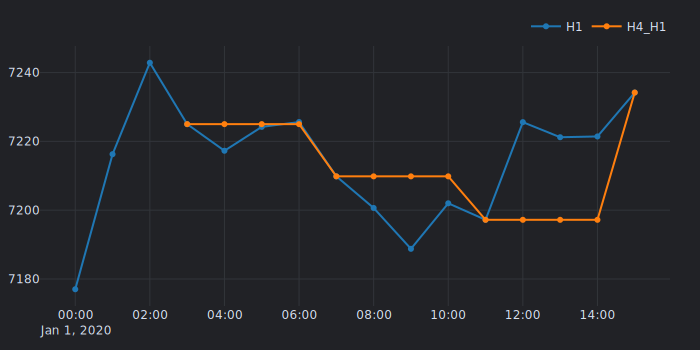

In [23]:
fig = h1_close.rename("H1").iloc[:16].vbt.plot()
h4_h1_close.rename("H4_H1").iloc[:16].vbt.plot(fig=fig).show_svg()

In [24]:
h1_h4_ratio = h1_close / h4_h1_close
h1_h4_ratio

Open time
2020-01-01 00:00:00+00:00         NaN
2020-01-01 01:00:00+00:00         NaN
2020-01-01 02:00:00+00:00         NaN
2020-01-01 03:00:00+00:00    1.000000
2020-01-01 04:00:00+00:00    0.998929
                               ...   
2020-12-31 19:00:00+00:00    1.000000
2020-12-31 20:00:00+00:00    1.007920
2020-12-31 21:00:00+00:00         NaN
2020-12-31 22:00:00+00:00         NaN
2020-12-31 23:00:00+00:00         NaN
Name: Close, Length: 8784, dtype: float64

In [25]:
h1_open = h1_data.get("Open")
h4_open  = h4_data.get("Open")

h1_open.iloc[:8]

Open time
2020-01-01 00:00:00+00:00    7195.24
2020-01-01 01:00:00+00:00    7176.47
2020-01-01 02:00:00+00:00    7215.52
2020-01-01 03:00:00+00:00    7242.66
2020-01-01 04:00:00+00:00    7225.00
2020-01-01 05:00:00+00:00    7217.26
2020-01-01 06:00:00+00:00    7224.24
2020-01-01 07:00:00+00:00    7225.88
Name: Open, dtype: float64

In [26]:
h4_h1_open = h4_open.resample("1h").first().ffill()
h4_h1_open.iloc[:8]

Open time
2020-01-01 00:00:00+00:00    7195.24
2020-01-01 01:00:00+00:00    7195.24
2020-01-01 02:00:00+00:00    7195.24
2020-01-01 03:00:00+00:00    7195.24
2020-01-01 04:00:00+00:00    7225.00
2020-01-01 05:00:00+00:00    7225.00
2020-01-01 06:00:00+00:00    7225.00
2020-01-01 07:00:00+00:00    7225.00
Freq: h, Name: Open, dtype: float64

### VBT

In [27]:
h4_close.vbt.realign_closing("1h")

Open time
2020-01-01 00:00:00+00:00         NaN
2020-01-01 01:00:00+00:00         NaN
2020-01-01 02:00:00+00:00         NaN
2020-01-01 03:00:00+00:00     7225.01
2020-01-01 04:00:00+00:00     7225.01
                               ...   
2020-12-31 16:00:00+00:00    28770.00
2020-12-31 17:00:00+00:00    28770.00
2020-12-31 18:00:00+00:00    28770.00
2020-12-31 19:00:00+00:00    28897.83
2020-12-31 20:00:00+00:00    28897.83
Freq: h, Name: Close, Length: 8781, dtype: float64

In [28]:
h4_open.vbt.realign_opening("1h")

Open time
2020-01-01 00:00:00+00:00     7195.24
2020-01-01 01:00:00+00:00     7195.24
2020-01-01 02:00:00+00:00     7195.24
2020-01-01 03:00:00+00:00     7195.24
2020-01-01 04:00:00+00:00     7225.00
                               ...   
2020-12-31 16:00:00+00:00    28782.01
2020-12-31 17:00:00+00:00    28782.01
2020-12-31 18:00:00+00:00    28782.01
2020-12-31 19:00:00+00:00    28782.01
2020-12-31 20:00:00+00:00    28897.84
Freq: h, Name: Open, Length: 8781, dtype: float64

#### Resampler

In [29]:
h4_h1_resampler = h4_close.vbt.wrapper.get_resampler("1h")
h4_h1_resampler.source_index

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-01 04:00:00+00:00',
               '2020-01-01 08:00:00+00:00', '2020-01-01 12:00:00+00:00',
               '2020-01-01 16:00:00+00:00', '2020-01-01 20:00:00+00:00',
               '2020-01-02 00:00:00+00:00', '2020-01-02 04:00:00+00:00',
               '2020-01-02 08:00:00+00:00', '2020-01-02 12:00:00+00:00',
               ...
               '2020-12-30 08:00:00+00:00', '2020-12-30 12:00:00+00:00',
               '2020-12-30 16:00:00+00:00', '2020-12-30 20:00:00+00:00',
               '2020-12-31 00:00:00+00:00', '2020-12-31 04:00:00+00:00',
               '2020-12-31 08:00:00+00:00', '2020-12-31 12:00:00+00:00',
               '2020-12-31 16:00:00+00:00', '2020-12-31 20:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', length=2196, freq='4h')

In [30]:
h4_h1_resampler.target_index

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-01 01:00:00+00:00',
               '2020-01-01 02:00:00+00:00', '2020-01-01 03:00:00+00:00',
               '2020-01-01 04:00:00+00:00', '2020-01-01 05:00:00+00:00',
               '2020-01-01 06:00:00+00:00', '2020-01-01 07:00:00+00:00',
               '2020-01-01 08:00:00+00:00', '2020-01-01 09:00:00+00:00',
               ...
               '2020-12-31 11:00:00+00:00', '2020-12-31 12:00:00+00:00',
               '2020-12-31 13:00:00+00:00', '2020-12-31 14:00:00+00:00',
               '2020-12-31 15:00:00+00:00', '2020-12-31 16:00:00+00:00',
               '2020-12-31 17:00:00+00:00', '2020-12-31 18:00:00+00:00',
               '2020-12-31 19:00:00+00:00', '2020-12-31 20:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Open time', length=8781, freq='h')

In [31]:
h4_h1_resampler.source_freq

Timedelta('0 days 04:00:00')

In [32]:
h4_h1_resampler.target_freq

Timedelta('0 days 01:00:00')

In [33]:
pd_resampler = h4_close.resample("1h")
vbt.Resampler.from_pd_resampler(pd_resampler)

In [34]:
resampler = vbt.Resampler.from_date_range(
    source_index=h4_close.index,
    source_freq="4h",
    start="2020-01-01 10:00:00",
    end="2020-01-01 22:00:00",
    freq="1h",
)

In [35]:
h4_close.vbt.realign_closing(resampler)

2020-01-01 10:00:00    7209.83
2020-01-01 11:00:00    7197.20
2020-01-01 12:00:00    7197.20
2020-01-01 13:00:00    7197.20
2020-01-01 14:00:00    7197.20
2020-01-01 15:00:00    7234.19
2020-01-01 16:00:00    7234.19
2020-01-01 17:00:00    7234.19
2020-01-01 18:00:00    7234.19
2020-01-01 19:00:00    7229.48
2020-01-01 20:00:00    7229.48
2020-01-01 21:00:00    7229.48
Freq: h, Name: Close, dtype: float64

#### Custom index

In [36]:
target_index = pd.Index([
    "2020-01-01",
    "2020-02-01",
    "2020-03-01",
    "2020-04-01",
    "2020-05-01",
    "2020-06-01",
    "2020-07-01",
    "2020-08-01",
    "2020-09-01",
    "2020-10-01",
    "2020-11-01",
    "2020-12-01",
    "2021-01-01"
])
resampler = vbt.Resampler(h4_close.index, target_index, target_freq=False)
h4_close.vbt.realign_closing(resampler)

/home/jupyter/miniconda3/envs/vectorbtpro/lib/python3.10/site-packages/vectorbtpro/generic/accessors.py:2433: UserWarning:

Using right bound of target index without frequency. Set target frequency.



2020-01-01     9352.89
2020-02-01     8523.61
2020-03-01     6410.44
2020-04-01     8620.00
2020-05-01     9448.27
2020-06-01     9138.55
2020-07-01    11335.46
2020-08-01    11649.51
2020-09-01    10776.59
2020-10-01    13791.00
2020-11-01    19695.87
2020-12-01    28923.63
2021-01-01    28923.63
Name: Close, dtype: float64

In [37]:
h4_close[h4_close.index < "2020-09-01"].iloc[-1]

11649.51

In [38]:
h4_open.vbt.realign_opening(resampler)

2020-01-01     7195.24
2020-02-01     9351.71
2020-03-01     8523.61
2020-04-01     6412.14
2020-05-01     8620.00
2020-06-01     9448.27
2020-07-01     9138.08
2020-08-01    11335.46
2020-09-01    11649.51
2020-10-01    10776.59
2020-11-01    13791.00
2020-12-01    19695.87
2021-01-01    28897.84
Name: Open, dtype: float64

In [39]:
h4_open[h4_open.index <= "2020-08-01"].iloc[-1]

11335.46

In [40]:
target_index = pd.Index([
    "2020-01-01",
    "2020-02-01",
])
resampler = vbt.Resampler(h4_close.index, target_index, target_freq=False)
h4_close.vbt.realign_closing(resampler)

/home/jupyter/miniconda3/envs/vectorbtpro/lib/python3.10/site-packages/vectorbtpro/generic/accessors.py:2433: UserWarning:

Using right bound of target index without frequency. Set target frequency.



2020-01-01     9352.89
2020-02-01    28923.63
Name: Close, dtype: float64

In [41]:
resampler = vbt.Resampler(h4_close.index, target_index, target_freq="30d")
h4_close.vbt.realign_closing(resampler)

2020-01-01    9513.21
2020-02-01    8531.88
Name: Close, dtype: float64

In [42]:
h4_open.vbt.realign("2020-06-07 12:15:00")

9576.57

In [43]:
h4_close.vbt.realign(
    "2020-06-07 12:15:00", 
    source_rbound=True
)

9575.59

In [44]:
h4_high = h4_data.get("High")
h4_high.vbt.realign(
    target_index, 
    source_rbound=True
)

2020-01-01       NaN
2020-02-01    9430.0
Name: High, dtype: float64

In [45]:
h4_high.index[h4_high.index < "2020-02-01"][-1]

Timestamp('2020-01-31 20:00:00+0000', tz='UTC')

In [46]:
h4_high.vbt.realign(
    target_index, 
    source_rbound=True,
    target_rbound=True
)

/home/jupyter/miniconda3/envs/vectorbtpro/lib/python3.10/site-packages/vectorbtpro/generic/accessors.py:2433: UserWarning:

Using right bound of target index without frequency. Set target frequency.



2020-01-01     9430.00
2020-02-01    29169.55
Name: High, dtype: float64

In [47]:
resampler = vbt.Resampler(h4_high.index, target_index)
resampler.target_rbound_index

DatetimeIndex(['2020-01-31 23:59:59.999999999', '2262-04-11 23:47:16.854775807'], dtype='datetime64[ns]', freq=None)

In [48]:
resampler = vbt.Resampler(
    h4_high.index, 
    target_index, 
    target_freq=pd.offsets.MonthBegin(1))
resampler.target_rbound_index

DatetimeIndex(['2020-01-31 23:59:59.999999999', '2020-02-29 23:59:59.999999999'], dtype='datetime64[ns]', freq=None)

In [49]:
h4_high.vbt.realign(
    resampler.replace(
        target_index=resampler.target_rbound_index, 
        target_freq=False
    ), 
    wrap_kwargs=dict(index=target_index)
)

2020-01-01    9430.00
2020-02-01    8671.61
Name: High, dtype: float64

In [50]:
h4_high.vbt.realign(
    target_index, 
    freq=pd.offsets.MonthBegin(1),
    target_rbound="pandas"
)

2020-01-01    9430.00
2020-02-01    8671.61
Name: High, dtype: float64

In [51]:
h4_high[h4_high.index < "2020-03-01"].resample(vbt.offset("M")).last()

Open time
2020-01-01 00:00:00+00:00    9430.00
2020-02-01 00:00:00+00:00    8671.61
Freq: MS, Name: High, dtype: float64

#### Numeric index

In [52]:
resampler = vbt.Resampler(
    source_index=np.arange(len(h4_high)),
    target_index=np.arange(len(h4_high))[::6],
    source_freq=1,
    target_freq=6
)
h4_high.vbt.realign(
    resampler, 
    source_rbound=True,
    target_rbound=True
)

0        7242.98
6        6985.00
12       7361.00
18       7367.31
24       7445.00
          ...   
2166    27095.18
2172    27163.77
2178    27410.00
2184    28996.00
2190    29169.55
Name: High, Length: 366, dtype: float64

#### Forward filling

In [53]:
min5_index = vbt.date_range(start="2020", freq="5min", periods=3)
min1_index = vbt.date_range(start="2020", freq="1min", periods=15)
min5_mask = pd.Series(False, index=min5_index)
min5_mask.iloc[0] = True
min5_mask.iloc[2] = True

resampler = vbt.Resampler(min5_index, min1_index)
min1_mask = min5_mask.vbt.realign_closing(resampler)
min1_mask

2020-01-01 00:00:00    NaN
2020-01-01 00:01:00    NaN
2020-01-01 00:02:00    NaN
2020-01-01 00:03:00    NaN
2020-01-01 00:04:00    1.0
2020-01-01 00:05:00    1.0
2020-01-01 00:06:00    1.0
2020-01-01 00:07:00    1.0
2020-01-01 00:08:00    1.0
2020-01-01 00:09:00    0.0
2020-01-01 00:10:00    0.0
2020-01-01 00:11:00    0.0
2020-01-01 00:12:00    0.0
2020-01-01 00:13:00    0.0
2020-01-01 00:14:00    1.0
Freq: min, dtype: float64

In [54]:
min1_mask = min5_mask.vbt.realign_closing(resampler, ffill=False)
min1_mask

2020-01-01 00:00:00    NaN
2020-01-01 00:01:00    NaN
2020-01-01 00:02:00    NaN
2020-01-01 00:03:00    NaN
2020-01-01 00:04:00    1.0
2020-01-01 00:05:00    NaN
2020-01-01 00:06:00    NaN
2020-01-01 00:07:00    NaN
2020-01-01 00:08:00    NaN
2020-01-01 00:09:00    0.0
2020-01-01 00:10:00    NaN
2020-01-01 00:11:00    NaN
2020-01-01 00:12:00    NaN
2020-01-01 00:13:00    NaN
2020-01-01 00:14:00    1.0
Freq: min, dtype: float64

In [55]:
min1_mask = min1_mask.fillna(False).astype(bool)
min1_mask

2020-01-01 00:00:00    False
2020-01-01 00:01:00    False
2020-01-01 00:02:00    False
2020-01-01 00:03:00    False
2020-01-01 00:04:00     True
2020-01-01 00:05:00    False
2020-01-01 00:06:00    False
2020-01-01 00:07:00    False
2020-01-01 00:08:00    False
2020-01-01 00:09:00    False
2020-01-01 00:10:00    False
2020-01-01 00:11:00    False
2020-01-01 00:12:00    False
2020-01-01 00:13:00    False
2020-01-01 00:14:00     True
Freq: min, dtype: bool

### Indicators

In [56]:
h4_sma = vbt.talib("SMA").run(h4_data.get("Close"), skipna=True).real
d1_sma = vbt.talib("SMA").run(d1_data.get("Close"), skipna=True).real

h4_sma = h4_sma.ffill()
d1_sma = d1_sma.ffill()

In [57]:
resampler = vbt.Resampler(
    d1_sma.index,
    h4_sma.index,
    source_freq="1d",
    target_freq="4h"
)
d1_h4_sma = d1_sma.vbt.realign_closing(resampler)

In [58]:
d1_sma["2020-12-30":]

Open time
2020-12-30 00:00:00+00:00    21746.412000
2020-12-31 00:00:00+00:00    22085.034333
Freq: D, Name: Close, dtype: float64

In [59]:
d1_h4_sma["2020-12-30":]

Open time
2020-12-30 00:00:00+00:00    21440.423000
2020-12-30 04:00:00+00:00    21440.423000
2020-12-30 08:00:00+00:00    21440.423000
2020-12-30 12:00:00+00:00    21440.423000
2020-12-30 16:00:00+00:00    21440.423000
2020-12-30 20:00:00+00:00    21746.412000
2020-12-31 00:00:00+00:00    21746.412000
2020-12-31 04:00:00+00:00    21746.412000
2020-12-31 08:00:00+00:00    21746.412000
2020-12-31 12:00:00+00:00    21746.412000
2020-12-31 16:00:00+00:00    21746.412000
2020-12-31 20:00:00+00:00    22085.034333
Freq: 4h, Name: Close, dtype: float64

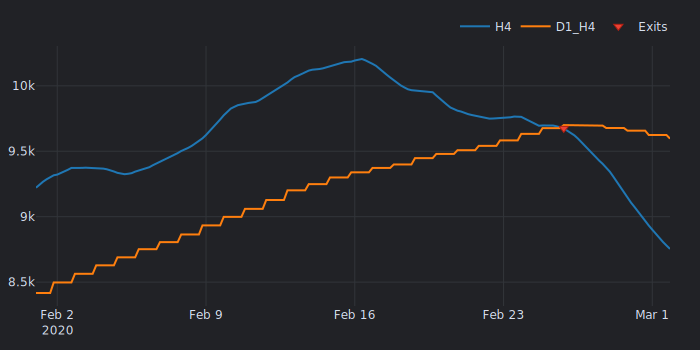

In [60]:
entries = h4_sma.vbt.crossed_above(d1_h4_sma)
exits = h4_sma.vbt.crossed_below(d1_h4_sma)

def plot_date_range(date_range):
    fig = h4_sma[date_range].rename("H4").vbt.plot()
    d1_h4_sma[date_range].rename("D1_H4").vbt.plot(fig=fig)
    entries[date_range].rename("Entry").vbt.signals.plot_as_entries(
        y=h4_sma[date_range], fig=fig)
    exits[date_range].rename("Exit").vbt.signals.plot_as_exits(
        y=h4_sma[date_range], fig=fig)
    return fig

plot_date_range(slice("2020-02-01", "2020-03-01")).show_svg()

In [61]:
d1_open_sma = vbt.talib("SMA").run(
    d1_data.get("Open"), 
    skipna=True
).real
d1_open_sma = d1_open_sma.ffill()

d1_h4_open_sma = d1_open_sma.vbt.realign(
    resampler, 
    source_rbound=False,
    target_rbound=True,
)

In [62]:
d1_open_sma["2020-12-30":]

Open time
2020-12-30 00:00:00+00:00    21440.420333
2020-12-31 00:00:00+00:00    21746.409667
Freq: D, Name: Open, dtype: float64

In [63]:
d1_h4_open_sma["2020-12-30":]

Open time
2020-12-30 00:00:00+00:00    21440.420333
2020-12-30 04:00:00+00:00    21440.420333
2020-12-30 08:00:00+00:00    21440.420333
2020-12-30 12:00:00+00:00    21440.420333
2020-12-30 16:00:00+00:00    21440.420333
2020-12-30 20:00:00+00:00    21440.420333
2020-12-31 00:00:00+00:00    21746.409667
2020-12-31 04:00:00+00:00    21746.409667
2020-12-31 08:00:00+00:00    21746.409667
2020-12-31 12:00:00+00:00    21746.409667
2020-12-31 16:00:00+00:00    21746.409667
2020-12-31 20:00:00+00:00    21746.409667
Freq: 4h, Name: Open, dtype: float64

In [64]:
def generate_bandwidths(freqs):
    bandwidths = []
    for freq in freqs:
        close = h1_data.resample(freq).get("Close")
        bbands = vbt.talib("BBANDS").run(close, skipna=True)
        upperband = bbands.upperband.ffill()
        middleband = bbands.middleband.ffill()
        lowerband = bbands.lowerband.ffill()
        bandwidth = (upperband - lowerband) / middleband
        bandwidths.append(bandwidth.vbt.realign_closing("1h"))
    df = pd.concat(bandwidths, axis=1, keys=pd.Index(freqs, name="timeframe"))
    return df.ffill()

bandwidths = generate_bandwidths(["1h", "4h", "1d", "7d"])
print(bandwidths)

timeframe                        1h        4h        1d        7d
Open time                                                        
2020-01-01 00:00:00+00:00       NaN       NaN       NaN       NaN
2020-01-01 01:00:00+00:00       NaN       NaN       NaN       NaN
2020-01-01 02:00:00+00:00       NaN       NaN       NaN       NaN
2020-01-01 03:00:00+00:00       NaN       NaN       NaN       NaN
2020-01-01 04:00:00+00:00  0.011948       NaN       NaN       NaN
...                             ...       ...       ...       ...
2020-12-31 19:00:00+00:00  0.027320  0.017939  0.134607  0.652958
2020-12-31 20:00:00+00:00  0.036515  0.017939  0.134607  0.652958
2020-12-31 21:00:00+00:00  0.025027  0.017939  0.134607  0.652958
2020-12-31 22:00:00+00:00  0.014318  0.017939  0.134607  0.652958
2020-12-31 23:00:00+00:00  0.012875  0.017939  0.134607  0.652958

[8784 rows x 4 columns]


/home/jupyter/miniconda3/envs/vectorbtpro/lib/python3.10/site-packages/jupyter_client/session.py:721: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



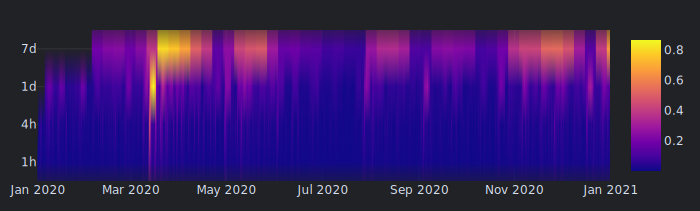

In [65]:
bandwidths.loc[:, ::-1].vbt.ts_heatmap().show_svg()

In [66]:
>>> bbands = vbt.talib("BBANDS").run(
...     h1_data.get("Close"), 
...     skipna=True, 
...     timeframe=["1h", "4h", "1d", "7d"],
...     broadcast_kwargs=dict(wrapper_kwargs=dict(freq="1h"))
... )
>>> bandwidth = (bbands.upperband - bbands.lowerband) / bbands.middleband
>>> print(bandwidths)

timeframe                        1h        4h        1d        7d
Open time                                                        
2020-01-01 00:00:00+00:00       NaN       NaN       NaN       NaN
2020-01-01 01:00:00+00:00       NaN       NaN       NaN       NaN
2020-01-01 02:00:00+00:00       NaN       NaN       NaN       NaN
2020-01-01 03:00:00+00:00       NaN       NaN       NaN       NaN
2020-01-01 04:00:00+00:00  0.011948       NaN       NaN       NaN
...                             ...       ...       ...       ...
2020-12-31 19:00:00+00:00  0.027320  0.017939  0.134607  0.652958
2020-12-31 20:00:00+00:00  0.036515  0.017939  0.134607  0.652958
2020-12-31 21:00:00+00:00  0.025027  0.017939  0.134607  0.652958
2020-12-31 22:00:00+00:00  0.014318  0.017939  0.134607  0.652958
2020-12-31 23:00:00+00:00  0.012875  0.017939  0.134607  0.652958

[8784 rows x 4 columns]


### Testing

In [67]:
def generate_signals(data, freq, fast_window, slow_window):
    open_price = data.get("Open").resample(freq).first()
    fast_sma = vbt.talib("SMA")\
        .run(
            open_price, 
            fast_window, 
            skipna=True, 
            short_name="fast_sma"
        )\
        .real.ffill()\
        .vbt.realign(data.wrapper.index)
    slow_sma = vbt.talib("SMA")\
        .run(
            open_price, 
            slow_window, 
            skipna=True, 
            short_name="slow_sma"
        )\
        .real.ffill()\
        .vbt.realign(data.wrapper.index)
    entries = fast_sma.vbt.crossed_above(slow_sma)
    exits = fast_sma.vbt.crossed_below(slow_sma)
    return entries, exits

fast_window = [10, 20]
slow_window = [20, 30]
h1_entries, h1_exits = generate_signals(h1_data, "1h", fast_window, slow_window)
h4_entries, h4_exits = generate_signals(h1_data, "4h", fast_window, slow_window)
d1_entries, d1_exits = generate_signals(h1_data, "1d", fast_window, slow_window)

entries = pd.concat(
    (h1_entries, h4_entries, d1_entries), 
    axis=1, 
    keys=pd.Index(["1h", "4h", "1d"], name="timeframe")
)
exits = pd.concat(
    (h1_exits, h4_exits, d1_exits), 
    axis=1, 
    keys=pd.Index(["1h", "4h", "1d"], name="timeframe")
)

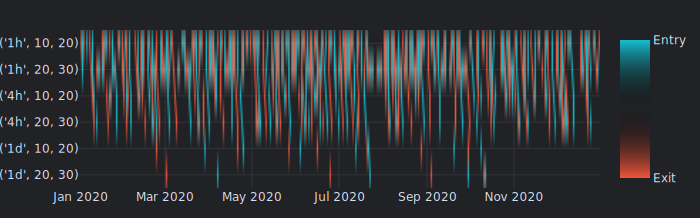

In [68]:
(entries.astype(int) - exits.astype(int))\
    .resample("1d").sum()\
    .vbt.ts_heatmap(
        trace_kwargs=dict(
            colorscale=["#ef553b", "rgba(0, 0, 0, 0)", "#17becf"],
            colorbar=dict(
                tickvals=[-1, 0, 1], 
                ticktext=["Exit", "", "Entry"]
            )
        )
    ).show_svg()

In [69]:
pf = vbt.Portfolio.from_signals(
    h1_data,
    entries,
    exits,
    sl_stop=0.1,
    freq="1h"
)

pf.orders.count()

timeframe  fast_sma_timeperiod  slow_sma_timeperiod
1h         10                   20                     504
           20                   30                     379
4h         10                   20                     111
           20                   30                      85
1d         10                   20                      13
           20                   30                       7
Name: count, dtype: int64

In [70]:
pf.sharpe_ratio

timeframe  fast_sma_timeperiod  slow_sma_timeperiod
1h         10                   20                     3.400095
           20                   30                     2.051091
4h         10                   20                     2.751626
           20                   30                     1.559501
1d         10                   20                     3.239846
           20                   30                     2.755367
Name: sharpe_ratio, dtype: float64

## Aggregation

In [71]:
ms_data = h1_data.resample("M")
ms_data.get("Low") / ms_data.get("High") - 1

Open time
2020-01-01 00:00:00+00:00   -0.282623
2020-02-01 00:00:00+00:00   -0.195714
2020-03-01 00:00:00+00:00   -0.588362
2020-04-01 00:00:00+00:00   -0.349883
2020-05-01 00:00:00+00:00   -0.193702
2020-06-01 00:00:00+00:00   -0.149037
2020-07-01 00:00:00+00:00   -0.222909
2020-08-01 00:00:00+00:00   -0.156360
2020-09-01 00:00:00+00:00   -0.184705
2020-10-01 00:00:00+00:00   -0.264255
2020-11-01 00:00:00+00:00   -0.335702
2020-12-01 00:00:00+00:00   -0.400262
Freq: MS, dtype: float64

In [72]:
h1_high = h1_data.get("High")
h1_low = h1_data.get("Low")
ms_high = h1_high.resample(vbt.offset("M")).max()
ms_low = h1_low.resample(vbt.offset("M")).min()
ms_low / ms_high - 1

Open time
2020-01-01 00:00:00+00:00   -0.282623
2020-02-01 00:00:00+00:00   -0.195714
2020-03-01 00:00:00+00:00   -0.588362
2020-04-01 00:00:00+00:00   -0.349883
2020-05-01 00:00:00+00:00   -0.193702
2020-06-01 00:00:00+00:00   -0.149037
2020-07-01 00:00:00+00:00   -0.222909
2020-08-01 00:00:00+00:00   -0.156360
2020-09-01 00:00:00+00:00   -0.184705
2020-10-01 00:00:00+00:00   -0.264255
2020-11-01 00:00:00+00:00   -0.335702
2020-12-01 00:00:00+00:00   -0.400262
Freq: MS, dtype: float64

In [73]:
ms_high = h1_high.vbt.resample_apply("M", vbt.nb.max_reduce_nb)
ms_low = h1_low.vbt.resample_apply("M", vbt.nb.min_reduce_nb)
ms_low / ms_high - 1

Open time
2020-01-01 00:00:00+00:00   -0.282623
2020-02-01 00:00:00+00:00   -0.195714
2020-03-01 00:00:00+00:00   -0.588362
2020-04-01 00:00:00+00:00   -0.349883
2020-05-01 00:00:00+00:00   -0.193702
2020-06-01 00:00:00+00:00   -0.149037
2020-07-01 00:00:00+00:00   -0.222909
2020-08-01 00:00:00+00:00   -0.156360
2020-09-01 00:00:00+00:00   -0.184705
2020-10-01 00:00:00+00:00   -0.264255
2020-11-01 00:00:00+00:00   -0.335702
2020-12-01 00:00:00+00:00   -0.400262
Freq: MS, dtype: float64

### Custom index

#### Using target index

In [74]:
target_index = pd.Index([
    "2020-01-01",
    "2020-02-01",
])
h1_high.vbt.resample_to_index(
    target_index, 
    vbt.nb.max_reduce_nb
)

/home/jupyter/miniconda3/envs/vectorbtpro/lib/python3.10/site-packages/vectorbtpro/base/resampling/base.py:318: UserWarning:

Using right bound of target index without frequency. Set target frequency.



2020-01-01     9578.0
2020-02-01    29300.0
Name: High, dtype: float64

In [75]:
target_rbound_index = vbt.Resampler.get_rbound_index(
    target_index, 
    pd.offsets.MonthBegin(1)
)
h1_high.vbt.resample_to_index(
    target_index.append(target_rbound_index[[-1]]), 
    vbt.nb.max_reduce_nb
).iloc[:-1]

/home/jupyter/miniconda3/envs/vectorbtpro/lib/python3.10/site-packages/vectorbtpro/base/resampling/base.py:318: UserWarning:

Using right bound of target index without frequency. Set target frequency.



2020-01-01     9578.0
2020-02-01    10500.0
Name: High, dtype: float64

In [76]:
h1_high[:"2020-03-01"].resample(vbt.offset("M")).max().iloc[:-1]

Open time
2020-01-01 00:00:00+00:00     9578.0
2020-02-01 00:00:00+00:00    10500.0
Freq: MS, Name: High, dtype: float64

#### Using group-by

In [77]:
pd_resampler = h1_high.resample(vbt.offset("M"))
ms_high = h1_high.vbt.groupby_apply(pd_resampler, vbt.nb.max_reduce_nb)
ms_low = h1_low.vbt.groupby_apply(pd_resampler, vbt.nb.min_reduce_nb)
ms_low / ms_high - 1

group
2020-01-01 00:00:00+00:00   -0.282623
2020-02-01 00:00:00+00:00   -0.195714
2020-03-01 00:00:00+00:00   -0.588362
2020-04-01 00:00:00+00:00   -0.349883
2020-05-01 00:00:00+00:00   -0.193702
2020-06-01 00:00:00+00:00   -0.149037
2020-07-01 00:00:00+00:00   -0.222909
2020-08-01 00:00:00+00:00   -0.156360
2020-09-01 00:00:00+00:00   -0.184705
2020-10-01 00:00:00+00:00   -0.264255
2020-11-01 00:00:00+00:00   -0.335702
2020-12-01 00:00:00+00:00   -0.400262
dtype: float64

In [78]:
target_lbound_index = pd.Index([
    "2020-01-01",
    "2020-02-01",
])
target_rbound_index = pd.Index([
    "2020-02-01",
    "2020-03-01",
])
h1_high.vbt.resample_between_bounds(
    target_lbound_index, 
    target_rbound_index,
    vbt.nb.max_reduce_nb
)

2020-01-01     9578.0
2020-02-01    10500.0
Name: High, dtype: float64

In [79]:
h1_high.vbt.resample_between_bounds(
    "2020-01-01", 
    vbt.date_range("2020-01-02", "2021-01-01", freq="M"),
    vbt.nb.max_reduce_nb
)

2020-02-01     9578.00
2020-03-01    10500.00
2020-04-01    10500.00
2020-05-01    10500.00
2020-06-01    10500.00
2020-07-01    10500.00
2020-08-01    11444.00
2020-09-01    12468.00
2020-10-01    12468.00
2020-11-01    14100.00
2020-12-01    19863.16
Freq: MS, Name: High, dtype: float64

In [80]:
h1_high.expanding().max().resample(vbt.offset("M")).max()

Open time
2020-01-01 00:00:00+00:00     9578.00
2020-02-01 00:00:00+00:00    10500.00
2020-03-01 00:00:00+00:00    10500.00
2020-04-01 00:00:00+00:00    10500.00
2020-05-01 00:00:00+00:00    10500.00
2020-06-01 00:00:00+00:00    10500.00
2020-07-01 00:00:00+00:00    11444.00
2020-08-01 00:00:00+00:00    12468.00
2020-09-01 00:00:00+00:00    12468.00
2020-10-01 00:00:00+00:00    14100.00
2020-11-01 00:00:00+00:00    19863.16
2020-12-01 00:00:00+00:00    29300.00
Freq: MS, Name: High, dtype: float64

### Meta methods

In [81]:
@njit
def mdd_nb(from_i, to_i, col, high, low):
    highest = np.nanmax(high[from_i:to_i, col])
    lowest = np.nanmin(low[from_i:to_i, col])
    return lowest / highest - 1

vbt.pd_acc.resample_apply(
    "M",
    mdd_nb,
    vbt.Rep("high"),
    vbt.Rep("low"),
    broadcast_named_args=dict(
        high=h1_high,
        low=h1_low
    )
)

Open time
2020-01-01 00:00:00+00:00   -0.282623
2020-02-01 00:00:00+00:00   -0.195714
2020-03-01 00:00:00+00:00   -0.588362
2020-04-01 00:00:00+00:00   -0.349883
2020-05-01 00:00:00+00:00   -0.193702
2020-06-01 00:00:00+00:00   -0.149037
2020-07-01 00:00:00+00:00   -0.222909
2020-08-01 00:00:00+00:00   -0.156360
2020-09-01 00:00:00+00:00   -0.184705
2020-10-01 00:00:00+00:00   -0.264255
2020-11-01 00:00:00+00:00   -0.335702
2020-12-01 00:00:00+00:00   -0.400262
Freq: MS, dtype: float64

In [82]:
h1_high.iloc[0:744]

Open time
2020-01-01 00:00:00+00:00    7196.25
2020-01-01 01:00:00+00:00    7230.00
2020-01-01 02:00:00+00:00    7244.87
2020-01-01 03:00:00+00:00    7245.00
2020-01-01 04:00:00+00:00    7230.00
                              ...   
2020-01-31 19:00:00+00:00    9320.00
2020-01-31 20:00:00+00:00    9339.97
2020-01-31 21:00:00+00:00    9373.85
2020-01-31 22:00:00+00:00    9430.00
2020-01-31 23:00:00+00:00    9419.96
Name: High, Length: 744, dtype: float64

In [83]:
h1_low.iloc[0:744].min() / h1_high.iloc[0:744].max() - 1

-0.28262267696805177

In [84]:
>>> target_lbound_index = vbt.date_range("2020-01-01", "2020-12-01", freq="M", tz="UTC")
>>> target_rbound_index = vbt.date_range("2020-02-01", "2021-01-01", freq="M", tz="UTC")
>>> vbt.pd_acc.resample_between_bounds(
...     target_lbound_index,
...     target_rbound_index,
...     mdd_nb,
...     vbt.Rep("high"),
...     vbt.Rep("low"),
...     broadcast_named_args=dict(
...         high=h1_high,
...         low=h1_low
...     )
... )

2020-01-01 00:00:00+00:00   -0.282623
2020-02-01 00:00:00+00:00   -0.195714
2020-03-01 00:00:00+00:00   -0.588362
2020-04-01 00:00:00+00:00   -0.349883
2020-05-01 00:00:00+00:00   -0.193702
2020-06-01 00:00:00+00:00   -0.149037
2020-07-01 00:00:00+00:00   -0.222909
2020-08-01 00:00:00+00:00   -0.156360
2020-09-01 00:00:00+00:00   -0.184705
2020-10-01 00:00:00+00:00   -0.264255
2020-11-01 00:00:00+00:00   -0.335702
Freq: MS, dtype: float64

### Numba

In [85]:
>>> from vectorbtpro.base.resampling.nb import map_bounds_to_source_ranges_nb

>>> range_starts, range_ends = map_bounds_to_source_ranges_nb(
...     source_index=h1_high.index.values,
...     target_lbound_index=target_lbound_index.values,
...     target_rbound_index=target_rbound_index.values,
...     closed_lbound=True,
...     closed_rbound=False,
... )
>>> np.column_stack((range_starts, range_ends))

array([[   0,  744],
       [ 744, 1434],
       [1434, 2177],
       [2177, 2895],
       [2895, 3639],
       [3639, 4356],
       [4356, 5100],
       [5100, 5844],
       [5844, 6564],
       [6564, 7308],
       [7308, 8027]])

In [86]:
>>> ms_mdd_arr = vbt.nb.reduce_index_ranges_meta_nb(
...     1,
...     range_starts,
...     range_ends,
...     mdd_nb,
...     vbt.to_2d_array(h1_high),
...     vbt.to_2d_array(h1_low)
... )
>>> ms_mdd_arr

array([[-0.28262268],
       [-0.19571429],
       [-0.58836199],
       [-0.34988266],
       [-0.1937022 ],
       [-0.14903661],
       [-0.22290895],
       [-0.15636028],
       [-0.18470481],
       [-0.26425532],
       [-0.33570238]])

In [87]:
>>> pd.Series(ms_mdd_arr[:, 0], index=target_lbound_index)

2020-01-01 00:00:00+00:00   -0.282623
2020-02-01 00:00:00+00:00   -0.195714
2020-03-01 00:00:00+00:00   -0.588362
2020-04-01 00:00:00+00:00   -0.349883
2020-05-01 00:00:00+00:00   -0.193702
2020-06-01 00:00:00+00:00   -0.149037
2020-07-01 00:00:00+00:00   -0.222909
2020-08-01 00:00:00+00:00   -0.156360
2020-09-01 00:00:00+00:00   -0.184705
2020-10-01 00:00:00+00:00   -0.264255
2020-11-01 00:00:00+00:00   -0.335702
Freq: MS, dtype: float64

### Caveats

In [88]:
h4_close_2d = h4_close.iloc[:12]
h4_close_2d

Open time
2020-01-01 00:00:00+00:00    7225.01
2020-01-01 04:00:00+00:00    7209.83
2020-01-01 08:00:00+00:00    7197.20
2020-01-01 12:00:00+00:00    7234.19
2020-01-01 16:00:00+00:00    7229.48
2020-01-01 20:00:00+00:00    7200.85
2020-01-02 00:00:00+00:00    7129.61
2020-01-02 04:00:00+00:00    7110.57
2020-01-02 08:00:00+00:00    7139.79
2020-01-02 12:00:00+00:00    7130.98
2020-01-02 16:00:00+00:00    6983.27
2020-01-02 20:00:00+00:00    6965.71
Freq: 4h, Name: Close, dtype: float64

In [89]:
h4_close_2d.resample("1d").last()

Open time
2020-01-01 00:00:00+00:00    7200.85
2020-01-02 00:00:00+00:00    6965.71
Freq: D, Name: Close, dtype: float64

In [90]:
h5_close = h1_close.resample("5h").last()
h5_close_2d = h5_close.iloc[:10]
h5_close_2d

Open time
2020-01-01 00:00:00+00:00    7217.27
2020-01-01 05:00:00+00:00    7188.77
2020-01-01 10:00:00+00:00    7221.43
2020-01-01 15:00:00+00:00    7229.48
2020-01-01 20:00:00+00:00    7211.02
2020-01-02 01:00:00+00:00    7138.93
2020-01-02 06:00:00+00:00    7161.83
2020-01-02 11:00:00+00:00    7130.98
2020-01-02 16:00:00+00:00    6948.49
2020-01-02 21:00:00+00:00    6888.85
Freq: 5h, Name: Close, dtype: float64

In [91]:
h5_close_2d.resample("1d").last()

Open time
2020-01-01 00:00:00+00:00    7211.02
2020-01-02 00:00:00+00:00    6888.85
Freq: D, Name: Close, dtype: float64

In [92]:
vbt.timedelta("1d") % vbt.timedelta("1h")

Timedelta('0 days 00:00:00')

In [93]:
vbt.timedelta("1d") % vbt.timedelta("4h")

Timedelta('0 days 00:00:00')

In [94]:
vbt.timedelta("1d") % vbt.timedelta("5h")

Timedelta('0 days 04:00:00')

In [95]:
h5_close_time = h5_close_2d.index.shift() - pd.Timedelta(nanoseconds=1)
h5_close_time.name = "Close time"
h5_close_2d.index = h5_close_time
h5_close_2d

Close time
2020-01-01 04:59:59.999999999+00:00    7217.27
2020-01-01 09:59:59.999999999+00:00    7188.77
2020-01-01 14:59:59.999999999+00:00    7221.43
2020-01-01 19:59:59.999999999+00:00    7229.48
2020-01-02 00:59:59.999999999+00:00    7211.02
2020-01-02 05:59:59.999999999+00:00    7138.93
2020-01-02 10:59:59.999999999+00:00    7161.83
2020-01-02 15:59:59.999999999+00:00    7130.98
2020-01-02 20:59:59.999999999+00:00    6948.49
2020-01-03 01:59:59.999999999+00:00    6888.85
Freq: 5h, Name: Close, dtype: float64

In [96]:
h5_close_2d.resample("1d").last()

Close time
2020-01-01 00:00:00+00:00    7229.48
2020-01-02 00:00:00+00:00    6948.49
2020-01-03 00:00:00+00:00    6888.85
Freq: D, Name: Close, dtype: float64

### Portfolio

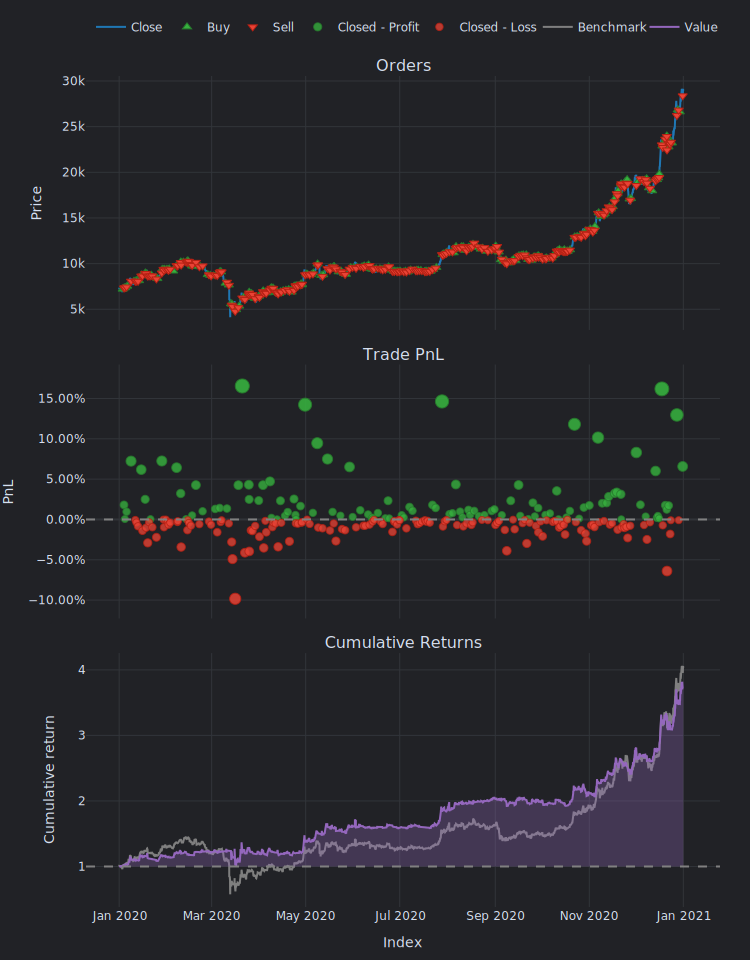

In [97]:
fast_sma = vbt.talib("SMA").run(h1_close, timeperiod=vbt.Default(10))
slow_sma = vbt.talib("SMA").run(h1_close, timeperiod=vbt.Default(20))
entries = fast_sma.real_crossed_above(slow_sma.real)
exits = fast_sma.real_crossed_below(slow_sma.real)

pf = vbt.Portfolio.from_signals(h1_close, entries, exits)
pf.plot().show_svg()

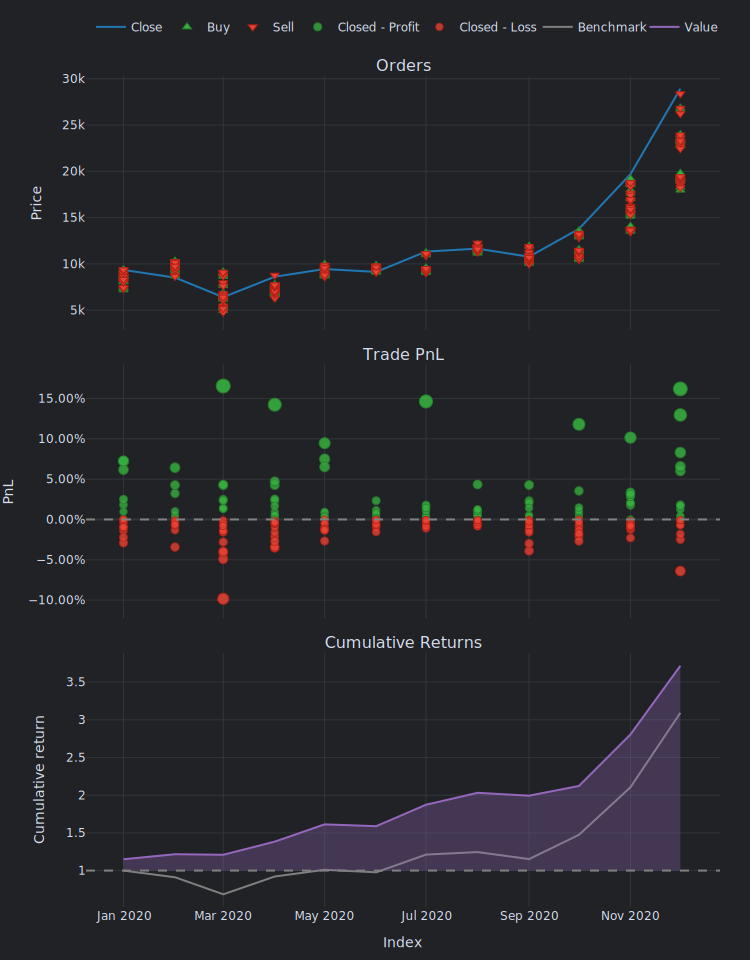

In [98]:
ms_pf = pf.resample("M")
ms_pf.plot().show_svg()

In [99]:
pf.total_return

2.716162213933899

In [100]:
ms_pf.total_return

2.716162213933899

In [101]:
(1 + pf.returns).resample(vbt.offset("M")).apply(lambda x: x.prod() - 1)

Open time
2020-01-01 00:00:00+00:00    0.150774
2020-02-01 00:00:00+00:00    0.057471
2020-03-01 00:00:00+00:00   -0.005920
2020-04-01 00:00:00+00:00    0.144156
2020-05-01 00:00:00+00:00    0.165367
2020-06-01 00:00:00+00:00   -0.015025
2020-07-01 00:00:00+00:00    0.179079
2020-08-01 00:00:00+00:00    0.084451
2020-09-01 00:00:00+00:00   -0.018819
2020-10-01 00:00:00+00:00    0.064898
2020-11-01 00:00:00+00:00    0.322020
2020-12-01 00:00:00+00:00    0.324325
Freq: MS, Name: Close, dtype: float64

In [102]:
ms_pf.returns

Open time
2020-01-01 00:00:00+00:00    0.150774
2020-02-01 00:00:00+00:00    0.057471
2020-03-01 00:00:00+00:00   -0.005920
2020-04-01 00:00:00+00:00    0.144156
2020-05-01 00:00:00+00:00    0.165367
2020-06-01 00:00:00+00:00   -0.015025
2020-07-01 00:00:00+00:00    0.179079
2020-08-01 00:00:00+00:00    0.084451
2020-09-01 00:00:00+00:00   -0.018819
2020-10-01 00:00:00+00:00    0.064898
2020-11-01 00:00:00+00:00    0.322020
2020-12-01 00:00:00+00:00    0.324325
Freq: MS, Name: Close, dtype: float64

In [103]:
ms_pf.trades.pnl.to_pd(reduce_func_nb="sum")

Open time
2020-01-01 00:00:00+00:00     15.077357
2020-02-01 00:00:00+00:00      6.613564
2020-03-01 00:00:00+00:00     -0.113362
2020-04-01 00:00:00+00:00     16.831599
2020-05-01 00:00:00+00:00     22.888280
2020-06-01 00:00:00+00:00     -2.502485
2020-07-01 00:00:00+00:00     26.603047
2020-08-01 00:00:00+00:00     18.804921
2020-09-01 00:00:00+00:00     -6.180621
2020-10-01 00:00:00+00:00     10.133302
2020-11-01 00:00:00+00:00     35.891558
2020-12-01 00:00:00+00:00    127.569061
Freq: MS, Name: Close, dtype: float64